In [1]:
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt

In [2]:
df_train =pd.read_csv("train.csv", parse_dates=['timestamp'])
df_test = pd.read_csv("test.csv", parse_dates=['timestamp'])
df_macro=pd.read_csv("macro.csv", parse_dates=['timestamp'])

# Checking for skewed data

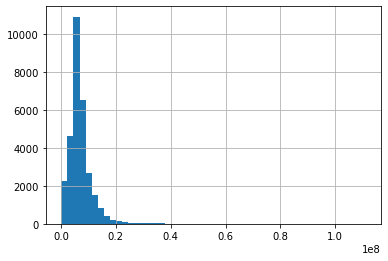

In [3]:
ax = df_train['price_doc'].hist(bins=50)

In [4]:
df_train['log_price_doc'] = np.log(df_train['price_doc'])

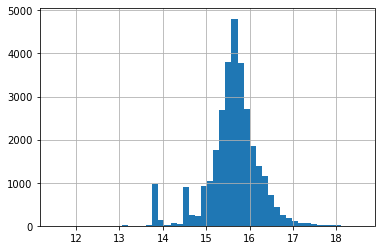

In [5]:
ax = df_train['log_price_doc'].hist(bins=50)

In [6]:
pd.set_option('float_format', '{:f}'.format)

# Using log representation to counter skewed data

A skewed data would meant that regression models that are derived off this data would be inaccurate. The reason behind this is the regression models assumes that the distribution of data is normal. Hence by imputting a skewed dataset, our results may be inaccurate.

We will be using the Log Transformation model for our case.

In [7]:
df_train.log_price_doc.describe()

count   30471.000000
mean       15.609483
std         0.604575
min        11.512925
25%        15.371548
50%        15.651990
75%        15.931766
max        18.526041
Name: log_price_doc, dtype: float64

## Exploring possibility of outliers 

In [8]:
print("0th quantile of log_price_doc : ", (np.quantile(df_train['log_price_doc'], 0)) )
print("2nd quantile of log_price_doc : ", (np.quantile(df_train['log_price_doc'], 0.02)) )
print("5th quantile of log_price_doc : ", np.quantile(df_train['log_price_doc'], .05) ) 
print("10th quantile of log_price_doc : ", np.quantile(df_train['log_price_doc'], .10) )
print("15th quantile of log_price_doc : ", np.quantile(df_train['log_price_doc'], .15) )
print("Q1 quantile of log_price_doc : ", np.quantile(df_train['log_price_doc'], .25) )
print("Q2 quantile of log_price_doc : ", np.quantile(df_train['log_price_doc'], .50) )
print("Q3 quantile of log_price_doc : ", np.quantile(df_train['log_price_doc'], .75) )
print("90th quantile of log_price_doc : ", np.quantile(df_train['log_price_doc'], .90) )
print("95th quantile of log_price_doc : ", np.quantile(df_train['log_price_doc'], .95) )
print("99th quantile of log_price_doc : ", (np.quantile(df_train['log_price_doc'], 0.99)) )
print("100th quantile of log_price_doc : ", np.quantile(df_train['log_price_doc'], 1) )

0th quantile of log_price_doc :  11.512925464970229
2nd quantile of log_price_doc :  13.815510557964274
5th quantile of log_price_doc :  14.508657738524219
10th quantile of log_price_doc :  14.914122846632385
15th quantile of log_price_doc :  15.1550198446908
Q1 quantile of log_price_doc :  15.371548115612098
Q2 quantile of log_price_doc :  15.651990174034736
Q3 quantile of log_price_doc :  15.931766072766827
90th quantile of log_price_doc :  16.283610089435893
95th quantile of log_price_doc :  16.489659207390805
99th quantile of log_price_doc :  17.015490027124464
100th quantile of log_price_doc :  18.526041267610193


## Removoing outliers


In [9]:
filter =   ( df_train['log_price_doc']>13.8155) & ( df_train['log_price_doc'] <17.01549)
filter_data =  df_train[filter]

print(filter_data.shape)
filter_data

(29934, 293)


,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc,log_price_doc
0,1,2011-08-20,43,27.000000,4.000000,nan,nan,nan,nan,nan,...,4,0,13,22,1,0,52,4,5850000,15.581952
1,2,2011-08-23,34,19.000000,3.000000,nan,nan,nan,nan,nan,...,3,0,15,29,1,10,66,14,6000000,15.607270
2,3,2011-08-27,43,29.000000,2.000000,nan,nan,nan,nan,nan,...,3,0,11,27,0,4,67,10,5700000,15.555977
3,4,2011-09-01,89,50.000000,9.000000,nan,nan,nan,nan,nan,...,2,1,4,4,0,0,26,3,13100000,16.388123
4,5,2011-09-05,77,77.000000,4.000000,nan,nan,nan,nan,nan,...,108,17,135,236,2,91,195,14,16331452,16.608603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30465,30468,2015-06-30,52,nan,13.000000,17.000000,1.000000,nan,2.000000,1.000000,...,141,26,150,249,2,105,203,13,6750554,15.725135
30466,30469,2015-06-30,44,27.000000,7.000000,9.000000,1.000000,1975.000000,2.000000,6.000000,...,5,0,15,26,1,2,84,6,7400000,15.816991
30468,30471,2015-06-30,45,nan,10.000000,20.000000,1.000000,nan,1.000000,1.000000,...,1,0,2,12,0,1,11,1,6970959,15.757263
30469,30472,2015-06-30,64,32.000000,5.000000,15.000000,1.000000,2003.000000,2.000000,11.000000,...,1,1,6,31,1,4,65,7,13500000,16.418200


# Removing Unrealistic and Erroneous Data

In [10]:
#Return Index of life sq < 7 and replace it as NaN
replace_index =  df_train[ df_train.life_sq < 7].index
df_train.loc[replace_index, 'life_sq'] = np.NaN
replace_index =  df_test[ df_test.life_sq < 7].index
df_test.loc[replace_index, 'life_sq'] = np.NaN

#Return Index of full sq < 7 and replace it as NaN
replace_index =  df_train[ df_train.life_sq < 7].index
df_train.loc[replace_index, 'full_sq'] = np.NaN
replace_index =  df_test[ df_test.life_sq < 7].index
df_test.loc[replace_index, 'full_sq'] = np.NaN

#If life > full NaN
replace_index =  df_train[ df_train.life_sq >  df_train.full_sq].index
df_train.loc[replace_index, 'life_sq'] = np.NaN
replace_index =  df_test[ df_test.life_sq >  df_test.full_sq].index
df_test.loc[replace_index, 'life_sq'] = np.NaN

replace_index =  df_train[ df_train.kitch_sq >=  df_train.life_sq].index
df_train.loc[replace_index, 'kitch_sq'] = np.NaN
replace_index =  df_test[ df_test.kitch_sq >=  df_test.life_sq].index
df_test.loc[replace_index, 'kitch_sq'] = np.NaN


replace_index =  df_train[( df_train.full_sq > 200) & ( df_train.life_sq/ df_train.full_sq < 0.3)].index
df_train.loc[replace_index, 'full_sq'] = np.NaN
replace_index =  df_test[( df_test.full_sq > 200) & ( df_test.life_sq/ df_test.full_sq < 0.3)].index
df_test.loc[replace_index, 'full_sq'] = np.NaN

# Unrealistic values for build year
replace_index =  df_train[ df_train.build_year < 1500].index
df_train.loc[replace_index, 'build_year'] = np.NaN
replace_index =  df_test[ df_test.build_year < 1500].index
df_test.loc[replace_index, 'build_year'] = np.NaN

replace_index =  df_train[ df_train.num_room == 0].index
df_train.loc[replace_index, 'num_room'] = np.NaN
replace_index =  df_test[ df_test.num_room == 0].index
df_test.loc[replace_index, 'num_room'] = np.NaN

replace_index =  df_train[ df_train.floor == 0].index
df_train.loc[replace_index, 'floor'] = np.NaN
replace_index =  df_test[ df_test.floor == 0].index
df_test.loc[replace_index, 'floor'] = np.NaN

replace_index =  df_train[ df_train.max_floor == 0].index
df_train.loc[replace_index, 'max_floor'] = np.NaN
replace_index =  df_test[ df_test.max_floor == 0].index
df_test.loc[replace_index, 'max_floor'] = np.NaN

replace_index =  df_train[ df_train.floor >  df_train.max_floor].index
df_train.loc[replace_index, 'max_floor'] = np.NaN
replace_index =  df_test[ df_test.floor >  df_test.max_floor].index
df_test.loc[replace_index, 'max_floor'] = np.NaN

df_train.loc[ df_train.full_sq == 0, 'full_sq'] = 50
df_train =  df_train[ df_train.price_doc/ df_train.full_sq <= 600000]
df_train =  df_train[ df_train.price_doc/ df_train.full_sq >= 10000]

#Return Index of each room is less then 5  and replace it as NaN
replace_index  =   df_train[ df_train.life_sq/ df_train.num_room  < 5].index
df_train.loc[replace_index, "num_room"] = np.NaN
replace_index  =   df_test[ df_test.life_sq/ df_test.num_room  < 5].index
df_test.loc[replace_index, "num_room"] = np.NaN

# Checking distance to kremlin

In [11]:
kremlin_check = df_train.groupby("sub_area")['kremlin_km'].mean().reset_index()
kremlin_check.sort_values(by = 'kremlin_km', ascending=True)

,sub_area,kremlin_km
134,Tverskoe,0.377544
4,Arbat,1.800239
142,Zamoskvorech'e,2.031389
35,Jakimanka,2.302088
63,Meshhanskoe,3.073346
...,...,...
89,Poselenie Klenovskoe,49.962915
96,Poselenie Novofedorovskoe,51.343341
104,Poselenie Voronovskoe,55.460831
88,Poselenie Kievskij,59.902534


Tverskoe is roughly 2km from Kremlin based off google maps, however the mean value is unusally low being less then 500m from Kremlin. A futher exploration on it is needed to find if there are any irregularities

In [12]:
df_train[df_train.sub_area=='Tverskoe'].kremlin_km.describe()

count   676.000000
mean      0.377544
std       0.920014
min       0.072897
25%       0.072897
50%       0.072897
75%       0.072897
max       4.337341
Name: kremlin_km, dtype: float64

In [13]:
df_test[df_test.sub_area=='Tverskoe'].kremlin_km.describe()

count   181.000000
mean      0.378725
std       0.967893
min       0.072897
25%       0.072897
50%       0.072897
75%       0.072897
max       4.022749
Name: kremlin_km, dtype: float64

### Accordign to forums could be a listing error
To tackle this issue we will change it to 2km based off google maps. To filter out listings that were not suppose to be in the Sadovoe ring, we will take the pricing of 180000/sqm as the minimum 

In [14]:
df_train['price_m2']=df_train.price_doc/df_train.full_sq
#compare number of listings in Tverskoy district with sq_m price of 180k+ vs 180k-
print('Number of listing in Tverskoe sub_area: ', len(df_train[df_train.sub_area=='Tverskoe']))
print('Number of listing in Tverskoe sub_area with sq m price >180.000: ',len(df_train[(df_train.sub_area=='Tverskoe')&(df_train.price_m2>180000)]))

Number of listing in Tverskoe sub_area:  676
Number of listing in Tverskoe sub_area with sq m price >180.000:  85


In [15]:
ylog_train_all = np.log1p(df_train['price_doc'].values)
id_test = df_test['id']

df_train.drop(['id', 'price_doc', "log_price_doc", "price_m2"], axis=1, inplace=True)
df_test.drop(['id'], axis=1, inplace=True)

# Build df_all = (df_train+df_test).join(df_macro)
num_train = len(df_train)
df_all = pd.concat([df_train, df_test])
df_all = pd.merge_ordered(df_all, df_macro, on='timestamp', how='left')
print(df_all.shape)

# Add month-year
month_year = (df_all.timestamp.dt.month + df_all.timestamp.dt.year * 100)
month_year_cnt_map = month_year.value_counts().to_dict()
df_all['month_year_cnt'] = month_year.map(month_year_cnt_map)

# Add week-year count
week_year = (df_all.timestamp.dt.weekofyear + df_all.timestamp.dt.year * 100)
week_year_cnt_map = week_year.value_counts().to_dict()
df_all['week_year_cnt'] = week_year.map(week_year_cnt_map)

# Add month and day-of-week
df_all['month'] = df_all.timestamp.dt.month
df_all['dow'] = df_all.timestamp.dt.dayofweek

# Other feature engineering
df_all['rel_floor'] = df_all['floor'] / df_all['max_floor'].astype(float)
df_all['rel_kitch_sq'] = df_all['kitch_sq'] / df_all['full_sq'].astype(float)

# Remove timestamp column (may overfit the model in train)
df_all.drop(['timestamp'], axis=1, inplace=True)

(38061, 389)


<ipython-input-15-061cc6881d3c>:19: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  week_year = (df_all.timestamp.dt.weekofyear + df_all.timestamp.dt.year * 100)


In [16]:
# Deal with categorical values
df_numeric = df_all.select_dtypes(exclude=['object'])
df_obj = df_all.select_dtypes(include=['object']).copy()

for c in df_obj:
    df_obj[c] = pd.factorize(df_obj[c])[0]

df_values = pd.concat([df_numeric, df_obj], axis=1)

In [17]:
# Convert to numpy values
X_all = df_values.values
print(X_all.shape)

# Create a validation set, with last 20% of data
num_val = int(num_train * 0.2)

X_train_all = X_all[:num_train]
X_train = X_all[:num_train-num_val]
X_val = X_all[num_train-num_val:num_train]
ylog_train = ylog_train_all[:-num_val]
ylog_val = ylog_train_all[-num_val:]

X_test = X_all[num_train:]

df_columns = df_values.columns

print('X_train_all shape is', X_train_all.shape)
print('X_train shape is', X_train.shape)
print('y_train shape is', ylog_train.shape)
print('X_val shape is', X_val.shape)
print('y_val shape is', ylog_val.shape)
print('X_test shape is', X_test.shape)

(38061, 394)
X_train_all shape is (30399, 394)
X_train shape is (24320, 394)
y_train shape is (24320,)
X_val shape is (6079, 394)
y_val shape is (6079,)
X_test shape is (7662, 394)


In [18]:
dtrain_all = xgb.DMatrix(X_train_all, ylog_train_all, feature_names=df_columns)
dtrain = xgb.DMatrix(X_train, ylog_train, feature_names=df_columns)
dval = xgb.DMatrix(X_val, ylog_val, feature_names=df_columns)
dtest = xgb.DMatrix(X_test, feature_names=df_columns)

In [19]:
params = {
    'eta': 0.05,
    'max_depth': 5,
    'subsample': 1.0,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}

# XGB `num_boost_rounds`
partial_model = xgb.train(params, dtrain, num_boost_round=1000, evals=[(dval, 'val')],
                       early_stopping_rounds=20, verbose_eval=20)

num_boost_round = partial_model.best_iteration

[18:28:33] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[18:28:33] WARNING: ..\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	val-rmse:14.47633
[20]	val-rmse:5.27409
[40]	val-rmse:1.99184
[60]	val-rmse:0.86394
[80]	val-rmse:0.52918
[100]	val-rmse:0.44762
[120]	val-rmse:0.42848
[140]	val-rmse:0.42246
[160]	val-rmse:0.42040
[180]	val-rmse:0.41936
[200]	val-rmse:0.41884
[220]	val-rmse:0.41855
[240]	val-rmse:0.41864
[245]	val-rmse:0.41858


In [20]:
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=5,
    metrics={'mae'},
    early_stopping_rounds=246
)
cv_results

[18:28:49] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[18:28:49] WARNING: ..\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:28:49] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[18:28:49] WARNING: ..\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you

,train-mae-mean,train-mae-std,test-mae-mean,test-mae-std
0,14.330911,0.001083,14.330939,0.004772
1,13.614526,0.001027,13.614539,0.004953
2,12.933937,0.000975,12.934007,0.005096
3,12.287379,0.000911,12.287497,0.005249
4,11.673164,0.000860,11.673248,0.005315
...,...,...,...,...
221,0.241602,0.001006,0.277673,0.002024
222,0.241445,0.001008,0.277623,0.002039
223,0.241302,0.000996,0.277573,0.002002
224,0.241174,0.000991,0.277574,0.002019


In [21]:
cv_results['test-mae-mean'].min()

0.2775068

# Hyperparameter Tuning

# Parameters max_depth and min_child_weight

- max_depth is the maximum depth tree. The deeper the trees the complex relationships it can find. However it runs a risk of over fitting

- min_child_weight is the minimum weight required in order to create a new node in the tree. A smaller min_child_weight allows the algorithm to create children that correspond to fewer samples, thus more complex relationships it can find. However it runs a risk of over fitting


In [22]:
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(4,6)
    for min_child_weight in range(3,6)
]

In [23]:
# Define initial best params and MAE
min_mae = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best MAE
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

CV with max_depth=4, min_child_weight=3
[18:29:52] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[18:29:52] WARNING: ..\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:29:52] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[18:29:52] WARNING: ..\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged w

[18:32:37] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[18:32:37] WARNING: ..\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:32:37] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[18:32:37] WARNING: ..\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you

# Updating Parameters

In [24]:
params['max_depth'] = 5
params['min_child_weight'] = 4

# Tuning for subsample and colsample_bytree

- subsample corresponds to the fraction of observations (the rows) to subsample at each step. 
- colsample_bytree corresponds to the fraction of features (the columns) to use.

In [25]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(7,10)]
    for colsample in [i/10. for i in range(7,10)]
]

In [26]:
min_mae = float("Inf")
best_params = None
# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (subsample,colsample)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

CV with subsample=0.9, colsample=0.9
[18:35:55] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[18:35:55] WARNING: ..\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:35:55] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[18:35:55] WARNING: ..\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wron

[18:39:35] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[18:39:35] WARNING: ..\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:39:35] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[18:39:35] WARNING: ..\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you

[18:43:17] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[18:43:17] WARNING: ..\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:43:17] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[18:43:17] WARNING: ..\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you

In [27]:
params['subsample'] = 0.9
params['colsample_bytree'] = 0.7

# Parameter ETA

ETA - Learning rate

In [28]:
%timeit
min_mae = float("Inf")
best_params = None
for eta in [.005, .004, .003]:
    print("CV with eta={}".format(eta))
    # We update our parameters
    %timeit params['eta'] = eta
    # Run and time CV
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds\n".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = eta
print("Best params: {}, MAE: {}".format(best_params, min_mae))

CV with eta=0.005
59.5 ns ± 0.272 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
[18:46:52] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[18:46:52] WARNING: ..\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:46:52] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[18:46:52] WARNING: ..\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or so

In [29]:
params['eta'] = .005

In [30]:
params

{'eta': 0.005,
 'max_depth': 5,
 'subsample': 0.9,
 'colsample_bytree': 0.7,
 'objective': 'reg:linear',
 'eval_metric': 'rmse',
 'silent': 1,
 'min_child_weight': 4}

In [31]:
xgb_params = {
    'eta': 0.005,
    'max_depth': 5,
    'subsample': 0.9,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1,
    'min_child_weight': 4
}

# XGB `num_boost_rounds`
partial_model = xgb.train(xgb_params, dtrain, num_boost_round=1000, evals=[(dval, 'val')],
                       early_stopping_rounds=20, verbose_eval=20)

num_boost_round = partial_model.best_iteration

[18:49:33] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[18:49:33] WARNING: ..\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	val-rmse:15.15567
[20]	val-rmse:13.72248
[40]	val-rmse:12.42608
[60]	val-rmse:11.25313
[80]	val-rmse:10.19225
[100]	val-rmse:9.23245
[120]	val-rmse:8.36391
[140]	val-rmse:7.57814
[160]	val-rmse:6.86777
[180]	val-rmse:6.22563
[200]	val-rmse:5.64466
[220]	val-rmse:5.11904
[240]	val-rmse:4.64373
[260]	val-rmse:4.21431
[280]	val-rmse:3.82581
[300]	val-rmse:3.47507
[320]	val-rmse:3.15786
[340]	val-rmse:2.87137
[360]	val-rmse:2.61250
[380]	val-rmse:2.37885
[400]	val-rmse:2.16792
[420]	

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

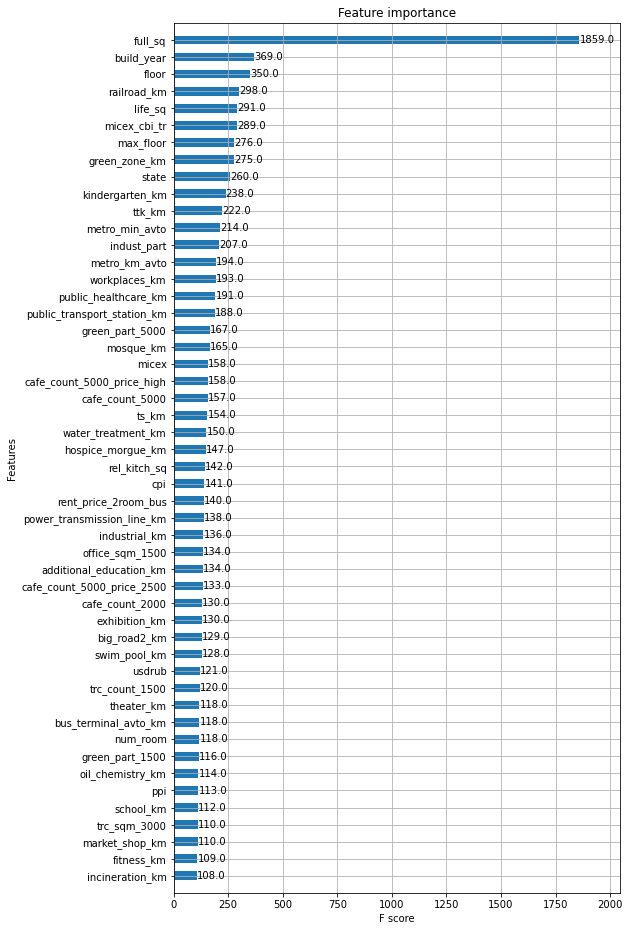

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(8, 16))
xgb.plot_importance(partial_model, max_num_features=50, height=0.5, ax=ax)

In [33]:
num_boost_round = partial_model.best_iteration

In [34]:
model = xgb.train(dict(params, silent=0), dtrain_all, num_boost_round=num_boost_round)

[18:50:38] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[18:50:38] WARNING: ..\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

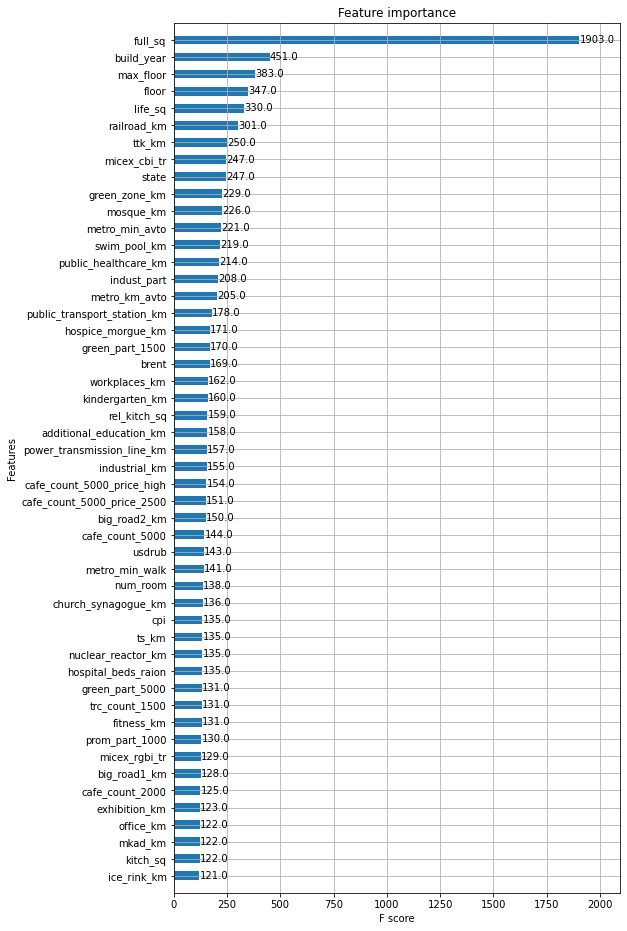

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(8, 16))
xgb.plot_importance(model, max_num_features=50, height=0.5, ax=ax)

In [36]:
ylog_pred = model.predict(dtest)
y_pred = np.exp(ylog_pred) - 1

df_sub = pd.DataFrame({'id': id_test, 'price_doc': y_pred})

df_sub.to_csv('Sub_Clean.csv', index=False)

### Most of the inital parameters seems to be the "best" when presented by the CV, the tuning by the CV seem to cause a slight amount of overfit thus, we will make the model simpler 

In [37]:
params = {
    'eta': 0.05,
    'max_depth': 5,
    'subsample': 1,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}

# XGB `num_boost_rounds`
partial_model = xgb.train(params, dtrain, num_boost_round=1000, evals=[(dval, 'val')],
                       early_stopping_rounds=20, verbose_eval=20)

num_boost_round = partial_model.best_iteration

[18:51:55] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[18:51:55] WARNING: ..\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	val-rmse:14.47633
[20]	val-rmse:5.27409
[40]	val-rmse:1.99184
[60]	val-rmse:0.86394
[80]	val-rmse:0.52918
[100]	val-rmse:0.44762
[120]	val-rmse:0.42848
[140]	val-rmse:0.42246
[160]	val-rmse:0.42040
[180]	val-rmse:0.41936
[200]	val-rmse:0.41884
[220]	val-rmse:0.41855
[240]	val-rmse:0.41864
[246]	val-rmse:0.41855


In [38]:
num_boost_round = partial_model.best_iteration

In [39]:
model = xgb.train(dict(params, silent=0), dtrain_all, num_boost_round=num_boost_round)

[18:52:11] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[18:52:11] WARNING: ..\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [40]:
ylog_pred = model.predict(dtest)
y_pred = np.exp(ylog_pred) - 1

df_sub = pd.DataFrame({'id': id_test, 'price_doc': y_pred})

df_sub.to_csv('Sub_Clean.csv', index=False)